In [1]:
import os
import joblib
import numpy as np
import pandas as pd

# Step 1: Define project root and model path
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
model_dir = os.path.join(project_root, "models")

# Step 2: Load the saved models
rf_model_path = os.path.join(model_dir, "rf_best_model.pkl")
xgb_model_path = os.path.join(model_dir, "xgb_best_model.pkl")

rf_model = joblib.load(rf_model_path)
xgb_model = joblib.load(xgb_model_path)

# Step 3: Prediction function
def predict_with_models(X_new):
    """
    Predicts using the loaded Random Forest and XGBoost models.
    
    Parameters:
    X_new (np.ndarray or pd.DataFrame): Feature matrix for new samples.

    Returns:
    dict: Probabilities from both models.
    """
    rf_preds = rf_model.predict_proba(X_new)[:, 1]
    xgb_preds = xgb_model.predict_proba(X_new)[:, 1]
    
    return {
        "rf_probability": rf_preds,
        "xgb_probability": xgb_preds
    }

# Step 4: Example usage
# Replace this with your real input after preprocessing (e.g. Morgan fingerprints)
X_example = np.random.rand(5, rf_model.n_features_in_)  # mock 5 samples

preds = predict_with_models(X_example)

# Display results
print("Random Forest Probabilities:", preds["rf_probability"])
print("XGBoost Probabilities:", preds["xgb_probability"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Random Forest Probabilities: [0.39006944 0.48837302 0.3958664  0.39356151 0.44893849]
XGBoost Probabilities: [0.01322727 0.01322727 0.01322727 0.01322727 0.01322727]


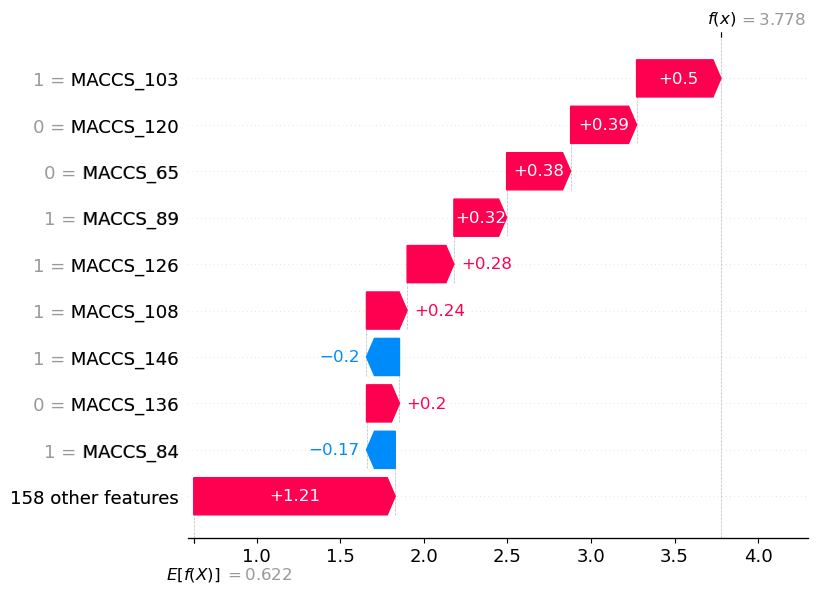

KeyError: np.int64(0)

In [5]:
# Step 1: Define project root and model path
#notebook_dir = os.getcwd()
#project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
#model_dir = os.path.join(project_root, "models")
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.shap_utils import generate_maccs_fingerprint, plot_waterfall_shap
from src.plot_utils import highlight_top_maccs_features
import pandas as pd
import joblib
from IPython.display import SVG, display
# Load model and background
model = joblib.load("../models/xgb_best_model.pkl")
X_train = joblib.load("../models/X_train.pkl")
feature_names = [f"MACCS_{i}" for i in range(167)]
background_df = pd.DataFrame(X_train, columns=feature_names)

# SMILES input
smiles = "CO[C@H]1CN(CC[C@H]1NC(=O)C2=CC(=C(C=C2OC)N)Cl)CCCOC3=CC=C(C=C3)F"
fingerprint, mol = generate_maccs_fingerprint(smiles)
fingerprint_df = pd.DataFrame([fingerprint], columns=feature_names)

# Plot waterfall
plot_waterfall_shap(model, fingerprint_df, background_df, feature_names)
import shap
# Highlight top SHAP MACCS features
svg_output = highlight_top_maccs_features(mol, shap.Explanation(values=model.predict(fingerprint_df), data=fingerprint_df, feature_names=feature_names), feature_names)
display(SVG(svg_output))

In [9]:
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.plot_utils import draw_molecule_with_shap_highlights
from rdkit import Chem
import numpy as np
from IPython.display import display
from PIL import Image
import io

mol = Chem.MolFromSmiles("CO[C@H]1CN(CC[C@H]1NC(=O)C2=CC(=C(C=C2OC)N)Cl)CCCOC3=CC=C(C=C3)F")
# Example: shap_values_array and maccs_features should come from your prediction and fingerprint

img_bytes = draw_molecule_with_shap_highlights(mol, shap_values_array, maccs_features, top_n=10)
display(Image.open(io.BytesIO(img_bytes)))

ImportError: cannot import name 'draw_molecule_with_shap_highlights' from 'src.plot_utils' (/Users/lokeshbaweja/hERG-Prediction-XGBoost-SHAP/src/plot_utils.py)